# TP 1 - Faits stylisés

## Import

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats

## Import et nettoyage des données intraday

In [2]:
# Download des données intraday brutes
intraday = pd.read_csv('/Users/badremhiouah/Desktop/3A SM10/Physique des marchés/données/intraday/2017-01-10-AAPL.OQ-bbo.csv.gz')
intraday.head()

,xltime,bid-price,bid-volume,ask-price,ask-volume
0,42745.375001,1.0,1,0.00,0
1,42745.375001,1.0,2,0.00,0
2,42745.375020,1.0,2,130.25,1
3,42745.375021,1.0,2,122.50,1
4,42745.375116,1.0,2,119.32,3


In [3]:
# Traitement des intraday
def load_TRTH_bbo(filename,
             tz_exchange="America/New_York",
             open_time="09:30:00",
             close_time="16:00:00",
             only_regular_trading_hours=True):
    
    DF = pd.read_csv(filename)

    DF.index = pd.to_datetime(DF["xltime"],unit="d",origin="1899-12-30",utc=True)
    DF.index = DF.index.tz_convert(tz_exchange)  # .P stands for Arca, which is based at New York
    DF.drop(columns="xltime",inplace=True)
    
    if only_regular_trading_hours:
        DF=DF.between_time(open_time,close_time)    # warning: ever heard e.g. about Thanksgivings?
        
    return DF

intraday = load_TRTH_bbo('/Users/badremhiouah/Desktop/3A SM10/Physique des marchés/données/intraday/2017-01-10-AAPL.OQ-bbo.csv.gz')
intraday.head()

,bid-price,bid-volume,ask-price,ask-volume
xltime,,,,
2017-01-10 09:30:00.251000576-05:00,118.76,1,118.86,1
2017-01-10 09:30:00.251000576-05:00,118.77,1,118.86,1
2017-01-10 09:30:00.251000576-05:00,118.78,1,118.86,1
2017-01-10 09:30:00.252000768-05:00,118.78,1,118.86,2
2017-01-10 09:30:00.259000576-05:00,118.78,1,118.86,4


In [4]:
# Choix d'intervalles à 5s
intraday = intraday.resample('5s').last()
# Ajout de midpoint price et des log rendements
intraday.resample('5s').last()
intraday['mid-price'] = (intraday['bid-price']+intraday['ask-price'])/2
intraday['r'] = np.log(intraday['mid-price']).diff()
intraday.head()

,bid-price,bid-volume,ask-price,ask-volume,mid-price,r
xltime,,,,,,
2017-01-10 09:30:00-05:00,118.71,3.0,118.77,2.0,118.740,NaN
2017-01-10 09:30:05-05:00,118.76,2.0,118.80,294.0,118.780,0.000337
2017-01-10 09:30:10-05:00,118.77,6.0,118.79,1.0,118.780,0.000000
2017-01-10 09:30:15-05:00,118.76,2.0,118.79,2.0,118.775,-0.000042
2017-01-10 09:30:20-05:00,118.73,2.0,118.74,2.0,118.735,-0.000337


In [5]:
# Suppression des rendements na
intraday = intraday.dropna()
intraday.head()

,bid-price,bid-volume,ask-price,ask-volume,mid-price,r
xltime,,,,,,
2017-01-10 09:30:05-05:00,118.76,2.0,118.80,294.0,118.780,0.000337
2017-01-10 09:30:10-05:00,118.77,6.0,118.79,1.0,118.780,0.000000
2017-01-10 09:30:15-05:00,118.76,2.0,118.79,2.0,118.775,-0.000042
2017-01-10 09:30:20-05:00,118.73,2.0,118.74,2.0,118.735,-0.000337
2017-01-10 09:30:25-05:00,118.73,4.0,118.75,2.0,118.740,0.000042


## Import et mise en forme des données journalières

In [6]:
# Download de yfinance
aapl = yf.download('AAPL')
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


In [7]:
# Log Prix
P_aapl = np.log(aapl['Adj Close'])
# Log Rendements
R_aapl = P_aapl.diff().dropna()
R_aapl.head()

Date
1980-12-15   -0.053581
1980-12-16   -0.076231
1980-12-17    0.024449
1980-12-18    0.028580
1980-12-19    0.059239
Name: Adj Close, dtype: float64

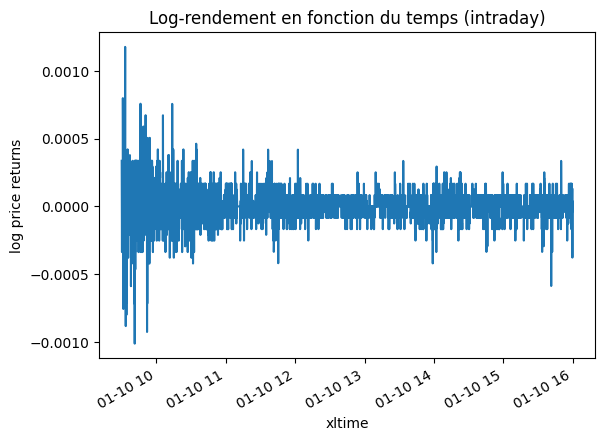

In [8]:
intraday['r'].plot()
plt.title('Log-rendement en fonction du temps (intraday)')
plt.ylabel('log price returns')
plt.show()

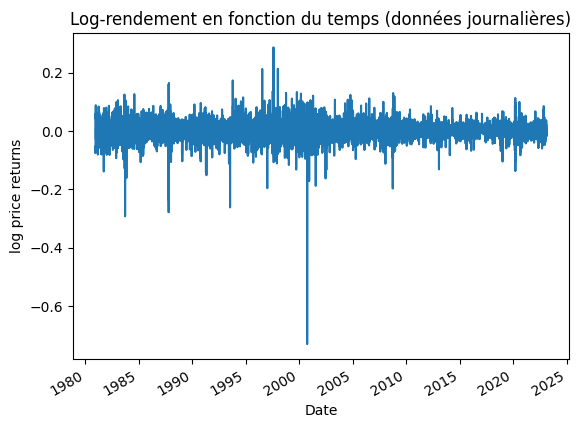

In [9]:
R_aapl.plot()
plt.title('Log-rendement en fonction du temps (données journalières)')
plt.ylabel('log price returns')
plt.show()

## Rendements : distributions

### Les rendements sont-ils gaussiens ?

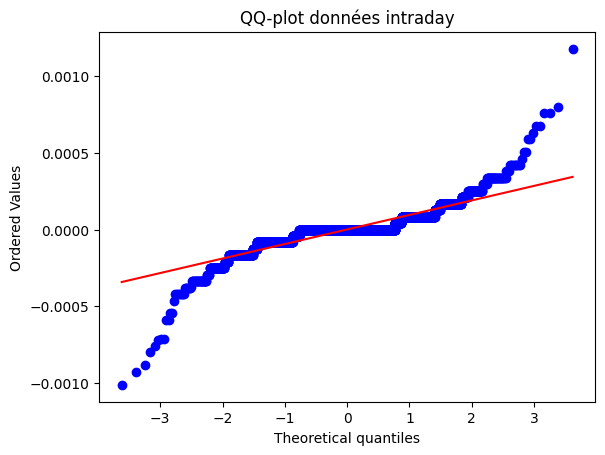

In [10]:
stats.probplot(intraday['r'],plot=plt)
plt.title('QQ-plot données intraday')
plt.show()

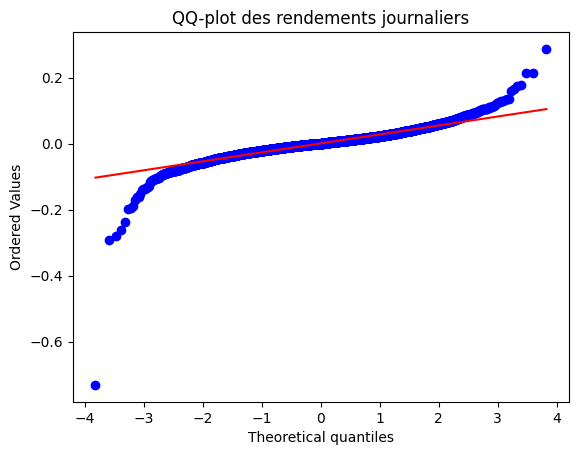

In [11]:
stats.probplot(R_aapl,plot=plt)
plt.title('QQ-plot des rendements journaliers')
plt.show()

### Etude des queues

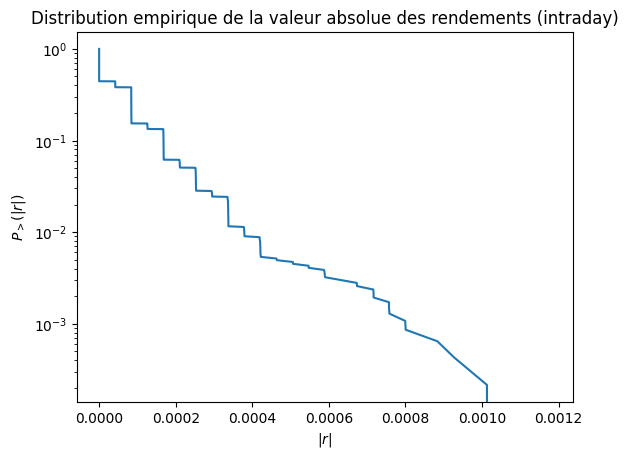

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF

# ECDF données intraday
ecdf = ECDF((abs(intraday['r'])))
plt.plot(ecdf.x,1-ecdf.y)
plt.yscale('log')
plt.ylabel('$P_{>}(|r|)$')
plt.xlabel('$|r|$')
plt.title('Distribution empirique de la valeur absolue des rendements (intraday)')
plt.show()

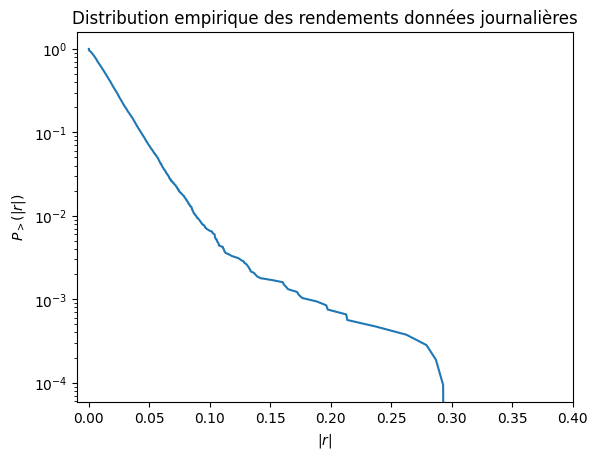

In [13]:
ecdf = ECDF((abs(R_aapl)))
plt.plot(ecdf.x,1-ecdf.y)
plt.yscale('log')
plt.xlim((-0.01, 0.4))
plt.ylabel('$P_{>}(|r|)$')
plt.xlabel('$|r|$')
plt.title('Distribution empirique des rendements données journalières')
plt.show()

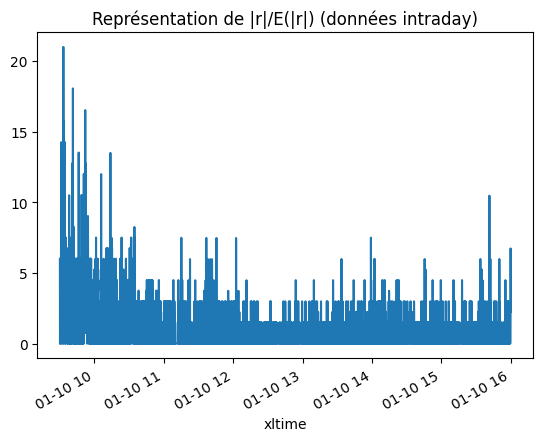

In [14]:
x_intraday = abs(intraday['r'])/np.mean(abs(intraday['r']))
(x_intraday).plot()
plt.title("Représentation de |r|/E(|r|) (données intraday)")
plt.show()

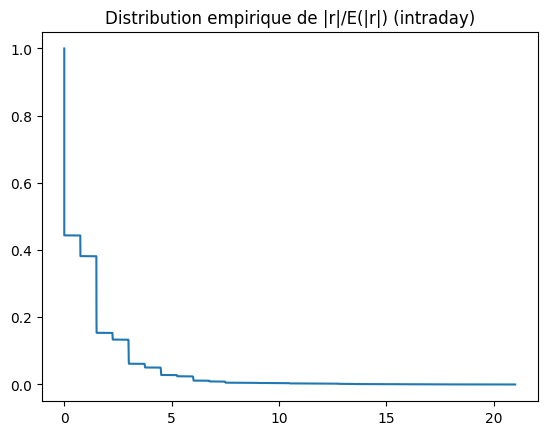

In [15]:
ecdf_x_intraday = ECDF(x_intraday)
plt.plot(ecdf_x_intraday.x,1-ecdf_x_intraday.y)
plt.title('Distribution empirique de |r|/E(|r|) (intraday)')
plt.show()

In [16]:
print('Quantiles empiriques de |r|/E(|r|)',stats.mstats.mquantiles(ecdf_x_intraday.y))

Quantiles empiriques de |r|/E(|r|) [0.24993566 0.5        0.75006434]


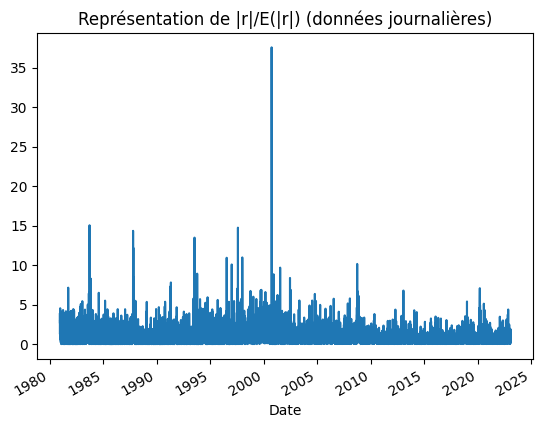

In [17]:
x = abs(R_aapl)/np.mean(abs(R_aapl))
(x).plot()
plt.title("Représentation de |r|/E(|r|) (données journalières)")
plt.show()

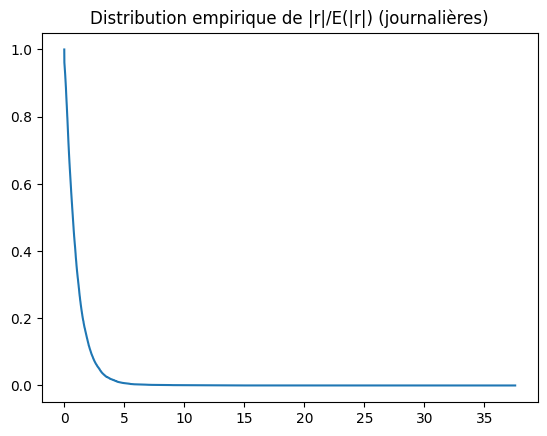

In [18]:
ecdf_x = ECDF(x)
plt.plot(ecdf_x.x,1-ecdf_x.y)
plt.title('Distribution empirique de |r|/E(|r|) (journalières)')
plt.show()

In [19]:
print('Quantiles empiriques de |r|/E(|r|)',np.quantile(ecdf_x.y, [0.25,0.5,0.75]))

Quantiles empiriques de |r|/E(|r|) [0.25 0.5  0.75]


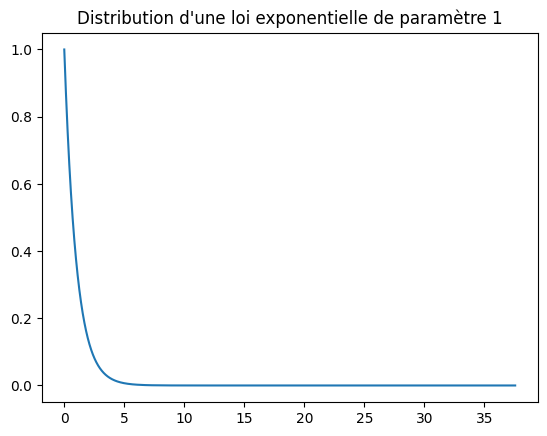

In [20]:
exp_2 = stats.expon.cdf(x=ecdf_x.x,scale=1)
plt.plot(ecdf_x.x,1-exp_2)
plt.title("Distribution d'une loi exponentielle de paramètre 1")
plt.show()

In [21]:
print("Quantiles empiriques d'une loi E(1)",stats.mstats.mquantiles(exp_2))

Quantiles empiriques d'une loi E(1) [0.27249681 0.5109904  0.73892114]


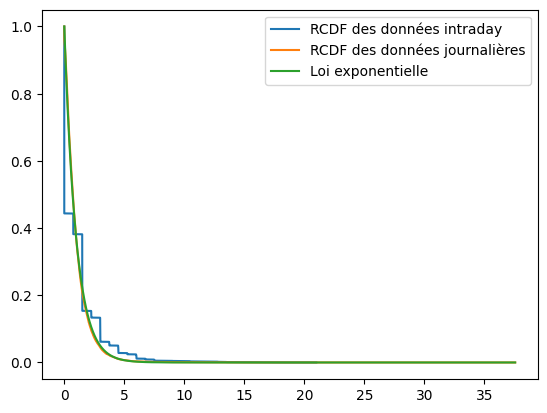

In [22]:
plt.plot(ecdf_x_intraday.x,1-ecdf_x_intraday.y,label = 'RCDF des données intraday')
plt.plot(ecdf_x.x,1-ecdf_x.y,label = 'RCDF des données journalières')
plt.plot(ecdf_x.x,1-exp_2, label = 'Loi exponentielle')
plt.legend()
plt.show()

On retrouve donc les mêmes valeurs d'une loi $\mathcal{E}(1)$ à première vue. Cependant, en passant à l'échelle logarithmique :

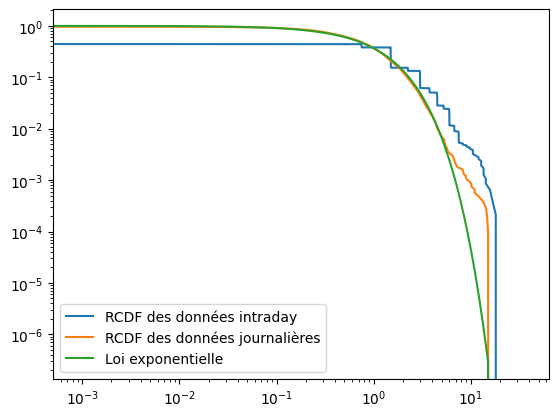

In [23]:
plt.plot(ecdf_x_intraday.x,1-ecdf_x_intraday.y,label = 'RCDF des données intraday')
plt.plot(ecdf_x.x,1-ecdf_x.y,label = 'RCDF des données journalières')
plt.plot(ecdf_x.x,1-exp_2, label = 'Loi exponentielle')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Les données ont une queue beaucoup plus lourde que la distribution exponentielle.

### Queue lourde

In [24]:
import powerlaw
result_intraday = powerlaw.Fit(1-ecdf_x_intraday.y)
alpha, xmin = result_intraday.power_law.alpha, result_intraday.power_law.xmin
print(alpha)
print(xmin)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
55.84534121515954%
0.9644006004717993


In [25]:
# loi de puissance

## Autocorrélation

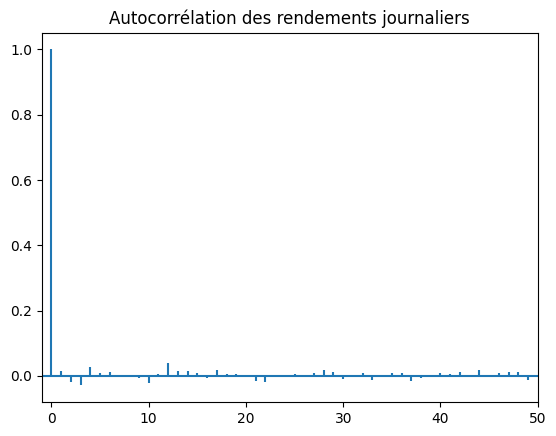

In [26]:
plt.acorr(R_aapl,maxlags = 50)
plt.title('Autocorrélation des rendements journaliers')
plt.xlim((-1,50))
plt.show()

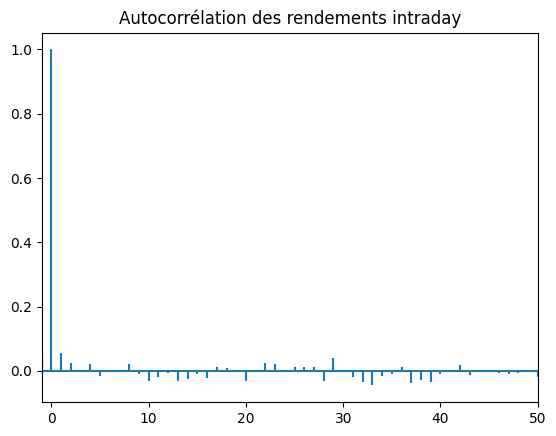

In [27]:
plt.acorr(intraday['r'],maxlags = 50)
plt.title('Autocorrélation des rendements intraday')
plt.xlim((-1,50))
plt.show()

On constate donc, comme l'intuition l'indique, que les rendements ne sont pas autocorrélés.

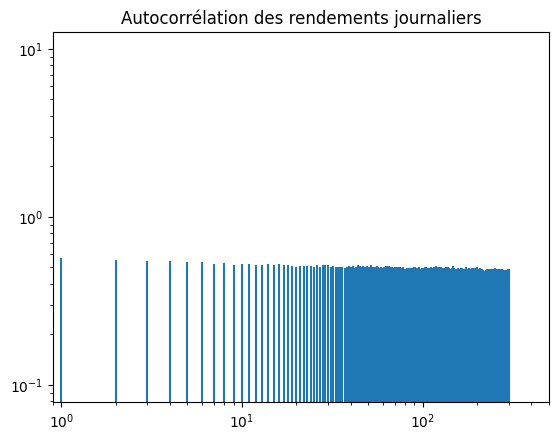

In [28]:
plt.acorr(abs(R_aapl),maxlags = 300)
plt.title('Autocorrélation des rendements journaliers')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0.9,500))
plt.show()

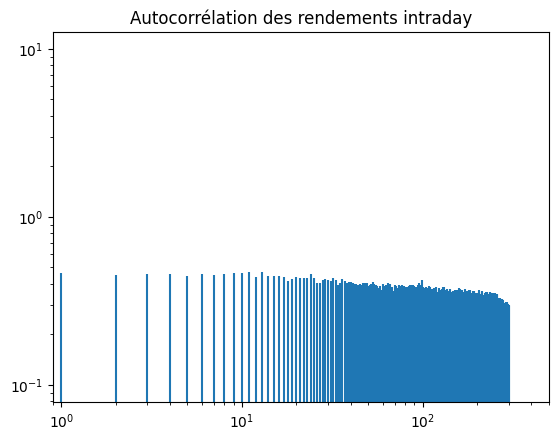

In [29]:
plt.acorr(abs(intraday['r']),maxlags = 300)
plt.title('Autocorrélation des rendements intraday')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0.9,500))
plt.show()

La valeur absolue des rendements, elle, semble hautement auto-corrélée. Les auto-corrélations sont toutes identiques en échelle logarithmique.

## Mesure de volatilité

In [30]:
R_aapl[1000:]

Date
1984-11-27    0.025706
1984-11-28    0.049512
1984-11-29   -0.019512
1984-11-30   -0.024938
1984-12-03   -0.015266
                ...   
2023-02-01    0.007870
2023-02-02    0.036392
2023-02-03    0.024107
2023-02-06   -0.018091
2023-02-07    0.019062
Name: Adj Close, Length: 9627, dtype: float64

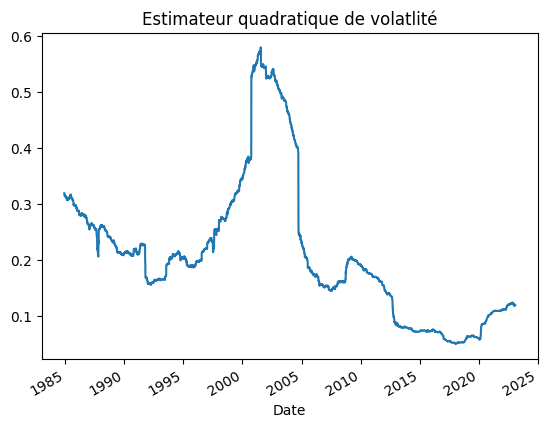

In [31]:
def estimator_quadr(log_r, A = 256, T = 1000):
    
    def f(v):
        return (A * v.mean())
    
    return (log_r**2).rolling(window=T, center=False).apply(func=f)

estimator_quadr(R_aapl).plot()
plt.title('Estimateur quadratique de volatlité')
plt.show()

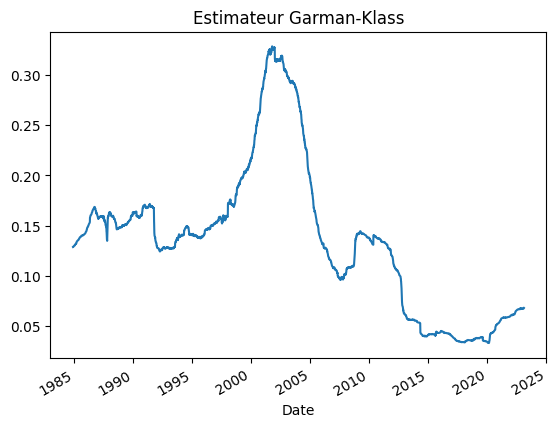

In [32]:
def garman_klass(data, T=1000, A=252):

    log_hl = np.log(data["High"] / data["Low"])
    log_co = np.log(data["Close"] / data["Open"])

    rs = 0.5*(log_hl**2) - (2 * np.log(2) - 1)*(log_co**2)
    
    def f(v):
        return (A * v.mean())

    return rs.rolling(window=T, center=False).apply(func=f)

garman_klass(aapl).plot()
plt.title('Estimateur Garman-Klass')
plt.show()

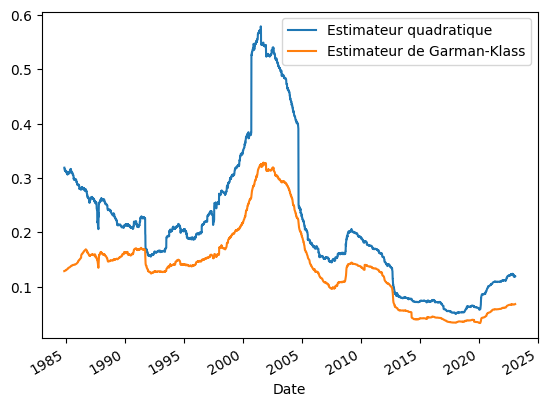

In [33]:
estimator_quadr(R_aapl).plot(label = 'Estimateur quadratique')
garman_klass(aapl).plot(label = 'Estimateur de Garman-Klass')
plt.legend()
plt.show()

- Garman Klass / quadratique même forme mais Garman Klass plsu continu
- quadratique au-dessus

In [34]:
parquet_file = pd.read_parquet('/Users/badremhiouah/Desktop/3A SM10/Physique des marchés/données/intraday/ES-bbo_backmonth+0_1minute.parquet')
parquet_file['mid'] = (parquet_file['ask']+parquet_file['bid'])/2
parquet_file['r'] = parquet_file['mid'].diff()
parquet_file['logr'] = np.log(parquet_file['r'])
parquet_file.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,bid,bidQ,ask,askQ,mid,r,logr
0,1997-09-09 15:31:00,929.25,10.0,944.50,3.0,936.875,NaN,NaN
1,1997-09-09 15:32:00,932.25,10.0,947.75,10.0,940.000,3.125,1.139434
2,1997-09-09 15:33:00,932.50,10.0,947.75,10.0,940.125,0.125,-2.079442
3,1997-09-09 15:34:00,941.75,2.0,946.50,1.0,944.125,4.000,1.386294
4,1997-09-09 15:35:00,941.50,8.0,946.25,2.0,943.875,-0.250,NaN
